68       4 May 2020 
69       5 May 2020 
70       6 May 2020 
71       7 May 2020 
72       8 May 2020 
73       9 May 2020 
74      10 May 2020 
75      11 May 2020 
76      12 May 2020 
77      13 May 2020 
78      14 May 2020 
79      15 May 2020 
80      16 May 2020 
81      17 May 2020 
82      18 May 2020 
83      19 May 2020 
84      20 May 2020 
85      21 May 2020 
86      22 May 2020 
87      23 May 2020 
88      24 May 2020 
89      25 May 2020 
90      26 May 2020 
91      27 May 2020 
92      28 May 2020 
93      29 May 2020 
94      30 May 2020 
95      31 May 2020 
96      1 June 2020 
97      2 June 2020 
98      3 June 2020 
99      4 June 2020 
100     5 June 2020 
101     6 June 2020 
102     7 June 2020 
103     8 June 2020 
104     9 June 2020 
105    10 June 2020 
106    11 June 2020 
107    12 June 2020 
Name: Date, dtype: object


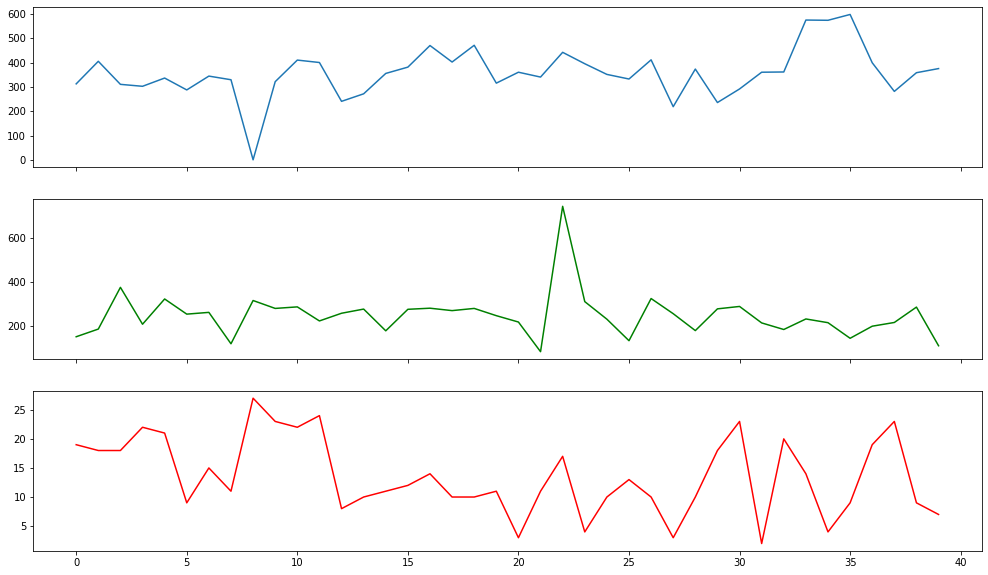

,Confirmed daily,Recovered,Official deaths daily
98,292.0,288.0,23.0
99,361.0,213.0,2.0
100,362.0,183.0,20.0
101,576.0,231.0,14.0
102,575.0,214.0,4.0
103,599.0,143.0,9.0
104,400.0,198.0,19.0
105,282.0,215.0,23.0
106,359.0,285.0,9.0
107,376.0,109.0,7.0


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("covid19.csv")
data = data.fillna(0)
data = data.drop(["Source","Unofficial deaths daily"], axis = 1)
data_train = data[["Confirmed daily", "Recovered", "Official deaths daily"]]
data_train = data_train.iloc[-40:,:]

fig, axes = plt.subplots(3,1, sharex=True, figsize=(17, 10))
axes[0].plot(range(data_train.shape[0]), data_train["Confirmed daily"] )
axes[1].plot(range(data_train.shape[0]), data_train["Recovered"] ,"g")
axes[2].plot(range(data_train.shape[0]), data_train["Official deaths daily"], "r" )
plt.show()

data_train.iloc[-10:,:]

In [44]:
print(data_train.corr())
print(np.sqrt(data_train.cov()))
print("\n Mean values:\n",data_train.mean())

                       Confirmed daily  Recovered  Official deaths daily
Confirmed daily               1.000000   0.000343              -0.169170
Recovered                     0.000343   1.000000               0.069113
Official deaths daily        -0.169170   0.069113               1.000000
                       Confirmed daily  Recovered  Official deaths daily
Confirmed daily              96.157235   1.788854                    NaN
Recovered                     1.788854  96.973013               7.478268
Official deaths daily              NaN   7.478268               8.344349

 Mean values:
 Confirmed daily          351.48
Recovered                241.30
Official deaths daily     15.38
dtype: float64


/home/robert/.pyenv/versions/NN_uwr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


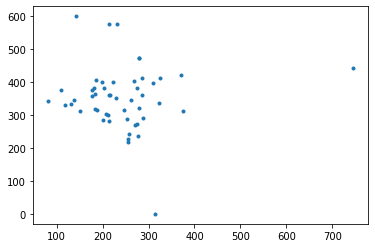

In [5]:
plt.plot(data_train["Recovered"], data_train["Confirmed daily"], "." )
plt.show()


Beta, gamma, sigma, delta, ni:  -1.3862943611198906 -1.3862943611198906 -1.6094379124341003 -4.0943445622221 -6.684611727667927
SEIR:  [0.9994195417024903, 3.002777736155942e-05, 0.00016047221999789896, 0.0003899166612619885, 5.555555478549384e-05, 5.555555478549384e-05]


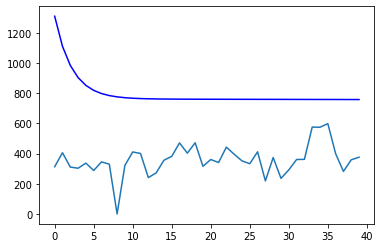

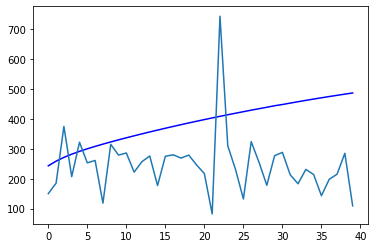

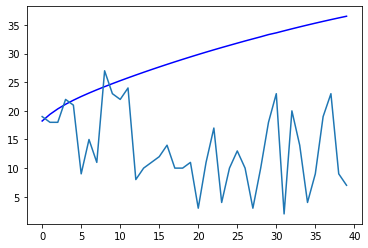

In [37]:
from functools import reduce
from scipy.integrate import odeint
R_obs_w = list(data_train["Confirmed daily"])
O_obs_w = list(data_train["Recovered"])
Z_obs_w = list(data_train["Official deaths daily"])
SEIR_init_unnorm = [35979104, 1081, 5777, 14037, 2000, 2000]
N = (35979104 + 1081.588 + 5777.911 + 14037.00)
SEIR_init = [a/N for a in SEIR_init_unnorm]
def system(y, t, beta, sigma, gamma, delta, ni):
    Sw, Ew, Iw, Rw, Ow, Zw = y
    dydt = [-np.exp(beta)*Iw*Sw, np.exp(beta)*Iw*Sw - np.exp(sigma)*Ew, np.exp(sigma)*Ew - np.exp(gamma)*Iw, np.exp(gamma)*Iw - (np.exp(delta) + np.exp(ni))*Rw, np.exp(delta)*Rw, np.exp(ni)*Rw]
    return dydt

def Rw_solution(y0, beta, sigma, gamma, delta, ni, t = np.linspace(0, len(R_obs_w), num = len(R_obs_w)+1)):
    solution = odeint(system, y0, t, args=(beta, sigma, gamma, delta, ni))
    R_change = solution[1:,3] - solution[:len(solution)-1,3]
    O_change = solution[1:,4] - solution[:len(solution)-1,4]
    Z_change = solution[1:,5] - solution[:len(solution)-1,5]
    return R_change + O_change + Z_change, O_change, Z_change

# Visualization of SEIR solution

i_beta, i_gamma, i_sigma, i_delta, i_ni = np.log(1/4), np.log(1/4), np.log(1/5) , np.log(1/60), np.log(1/800)
print("Beta, gamma, sigma, delta, ni: ",i_beta, i_gamma, i_sigma,i_delta, i_ni)
print("SEIR: ",SEIR_init)
R_SEIR_w, O_SEIR_w, Z_SEIR_w = Rw_solution(SEIR_init, beta = i_beta, gamma =  i_gamma, sigma = i_sigma, delta = i_delta, ni = i_ni)

plt.plot(range(len(R_obs_w)),[a*N for a in R_SEIR_w], "b")
plt.plot(range(len(R_obs_w)),R_obs_w)
plt.show()

plt.plot(range(len(O_obs_w)),[a*N for a in O_SEIR_w], "b")
plt.plot(range(len(O_obs_w)),O_obs_w)
plt.show()

plt.plot(range(len(Z_obs_w)),[a*N for a in Z_SEIR_w], "b")
plt.plot(range(len(Z_obs_w)),Z_obs_w)
plt.show()

In [39]:
import tensorflow_probability as tfp
import tensorflow as tf

tfd = tfp.distributions

# Define join probability
def joint_log_prob(beta, sigma, gamma, delta, ni, R_obs_w = R_obs_w, O_obs_w = O_obs_w, Z_obs_w = Z_obs_w, SEIR_init= SEIR_init):
    beta_prior = tfd.Normal(loc = np.log(1/5), scale = 1)
    gamma_prior = tfd.Normal(loc = np.log(1/5), scale = 1)
    sigma_prior = tfd.Normal(loc = np.log(1/3.5), scale = 1)
    delta_prior = tfd.Normal(loc = np.log(1/60), scale = 1)
    ni_prior = tfd.Normal(loc = np.log(1/800), scale = 1)
    
    prior = beta_prior.log_prob(beta) + gamma_prior.log_prob(gamma) + sigma_prior.log_prob(sigma) + \
            delta_prior.log_prob(delta) + ni_prior.log_prob(ni)
            
    likelihood_R = 0
    likelihood_O = 0
    likelihood_Z = 0
    
    sigma_R = 400
    sigma_O = 300
    sigma_Z = 25
    
    R_SEIR, O_SEIR, Z_SEIR =  Rw_solution(SEIR_init, beta = beta, gamma =  gamma, sigma = sigma, delta = delta, ni = ni)
    R_SEIR = [r*N for r in R_SEIR]
    O_SEIR = [o*N for o in O_SEIR]
    Z_SEIR = [z*N for z in Z_SEIR]
    
    for i in range(len(R_obs_w)):
        likelihood_R += tfd.NegativeBinomial.log_prob(round(R_obs_w[i]), p = 1 - R_SEIR[i]/(R_SEIR[i] + sigma_R), f = (R_SEIR[i]**2)/(sigma_R))
        likelihood_O += tfd.NegativeBinomial.log_prob(round(O_obs_w[i]), p = 1 - O_SEIR[i]/(O_SEIR[i] + sigma_O), f = (O_SEIR[i]**2)/(sigma_O))
        likelihood_R += tfd.NegativeBinomial.log_prob(round(Z_obs_w[i]), p = 1 - Z_SEIR[i]/(Z_SEIR[i] + sigma_Z), f = (Z_SEIR[i]**2)/(sigma_Z))
        
    
    return prior + likelihood_O + likelihood_R + likelihood_Z



In [ ]:
R_obs_w = list(data_train["Confirmed daily"])
O_obs_w = list(data_train["Recovered"])
Z_obs_w = list(data_train["Official deaths daily"])

# Sample from posterior distributions
num_results = int(1e3)
num_burnin_steps = int(1e2)

In [40]:

hmc = tfp.mcmc.MetropolisHastings(
    tfp.mcmc.UncalibratedHamiltonianMonteCarlo(
        target_log_prob_fn=joint_log_prob,
        step_size=0.5,
        num_leapfrog_steps=3))

samples, is_accepted = tfp.mcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state = [np.log(1/5), np.log(1/5), np.log(1/5), np.log(1/3.5), np.log(1/60), np.log(1/800)],
    kernel=hmc)

samples_all.append(samples.numpy())

TypeError: Scalar tensor has no `len()`

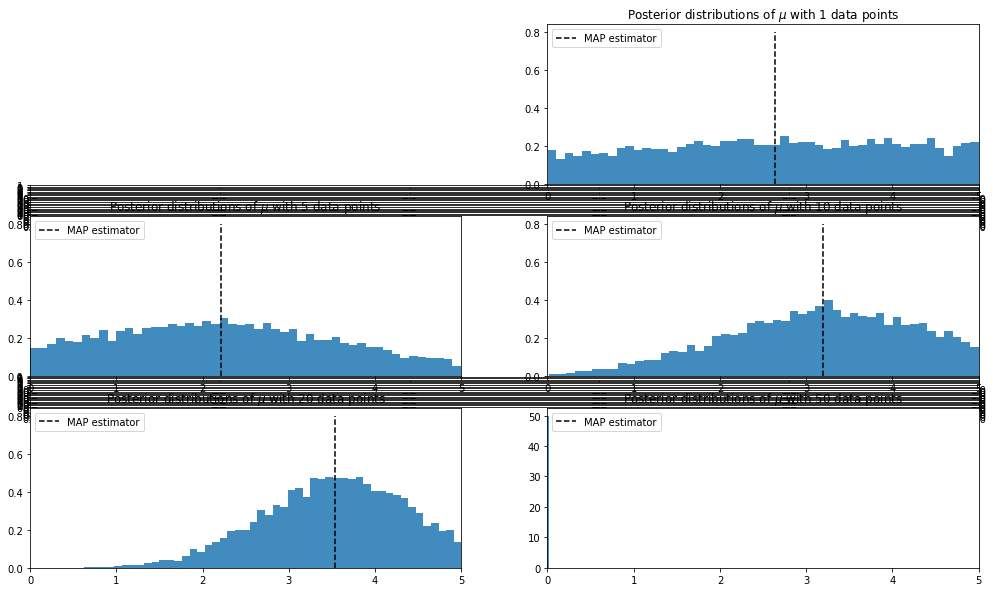

In [10]:
# Plot prior and posterior distributions

fig, axs = plt.subplots(321, figsize=(17, 10))
plt.hist(tfd.Uniform(low = 0, high = 5).sample(1e4), density = True, bins = 50)
plt.title("Prior distribution")
plt.ylim(0, 0.8)

for i in range(5):    
    ax = plt.subplot(3, 2, i + 2)
    plt.hist(samples_all[i], histtype = 'stepfilled', bins = 50, alpha = 0.85,
             label = None, density = True)
    plt.title("Posterior distributions of $\mu$ with " + str(data_length[i]) + " data points")
    plt.vlines(np.median(samples_all[i]), 0, 0.8, linestyle="--", label = "MAP estimator")
    plt.legend(loc = "upper left")
    plt.xlim(0, 5)